# Is the Winter Season Shifting in the Northeast? 
Study Presentated by: Brian Genet 
5/17/2023

This study is set to investigate if the 'Winter Season' is shifting to later in the year with the analysis of Temperature, SWE, and Streamflow in the Hubbard Brook Experimental Forest in New Hampshire.  

The Hubbard Brook Experiemntal forest is located in southwestern part of the white mountains in New Hampshire. This area is a 3,037 hectacre valley that contains small water sheds. The area is dominated northern hardwood forests  with spruce-fir forest at higher elevations. The area is filled with smaller streams that lead into the Pemigewasset River south of the experimental forest. 


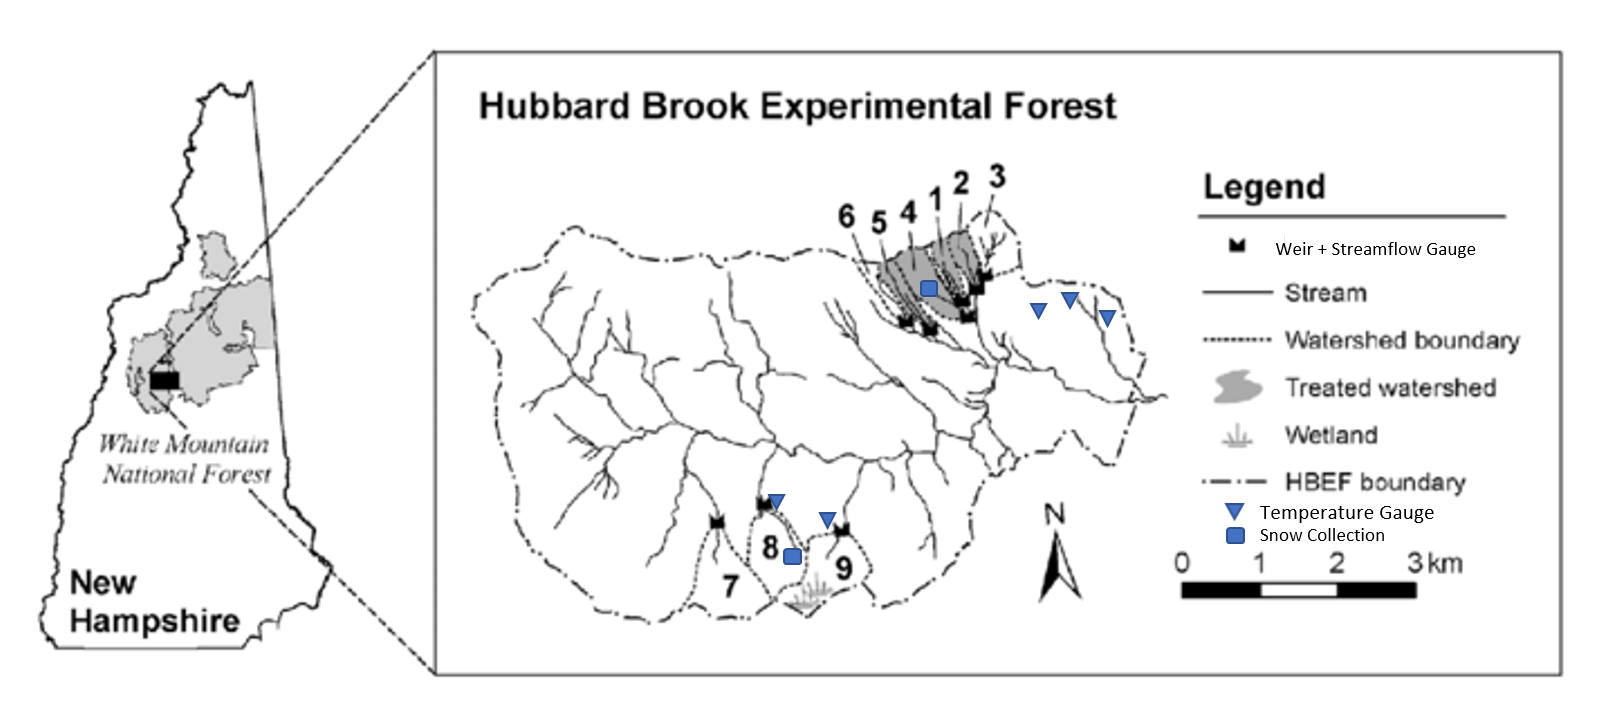

The data sets collected and used for research include Daily Temperature, Daily Streamflow and weekly SWE values. The goal is to find the centroid to understand when the middle of the season is occuring.  

Intial parameters, imports, and study period.

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np 
import matplotlib as mpl

#%% Specify Parameters

#Data for research
infile_names = ['Streamflow.csv','Temperature.csv','SWE.csv']

#Title for Figure
fig_title = 'Hubbard Brook Experimental Forest, NH'

#Begining of Study Period
start_date = '1956-10-01'

#End of Study Period
end_date = '2021-9-30'

Loading data into program and naming data frames, and cleaning data. 

In [2]:
#%%Creating Dataframe for Streamflow Data

#Load Data
data_q = pd.read_csv(infile_names[0], parse_dates=['DATE'], index_col=['DATE'])

#Drop Colums
data_q.drop(columns = {'WS' , 'Flag'}, inplace = True)

#Rename Discharge
data_q=data_q.rename(columns={'Streamflow' : 'discharge_L/s'})

In [3]:
#%%Creating Dataframe for Temperature Data

#Load Data
data_t = pd.read_csv(infile_names[1], parse_dates=['date'], index_col=['date'])

#Drop Colums
data_t.drop(columns = {"STA" , 'Flag','MAX','MIN'}, inplace = True)

#Rename Discharge
data_t=data_t.rename(columns={'AVE' : 'Average Temp'})

# Reshape streamflow data to separate each year 
data_t=data_t.resample('D').mean()

In [4]:
#%%Creating Dataframe for SWE Data

#Load Data
data_swe = pd.read_csv(infile_names[2], parse_dates=['Date'], index_col=['Date'])

#Drop Colums
data_swe.drop(columns = {"frost_depth","frost_pct","WINTER","Site","snow_depth"}, inplace = True)

#Replace Missing Falues
data_swe.replace(-99,np.nan, inplace=True)

# Reshape streamflow data to separate each year 
data_swe=data_swe.resample('D').mean()

Merging DataFrames into a single data frame to make it easier to work with. 

In [5]:
#%% Merging Dataframes
data=pd.merge(data_q,data_t,left_index=True,right_index=True)
data=pd.merge(data,data_swe,left_index=True,right_index=True)

Resampling data for consistant indexes, adding day of year, day of water year, trimming dates, and setting day of wateryear and water year to actual dates. 

In [6]:
#%% Resampling and making data useful
data=data.resample('D').mean()
#Adding Day of year
data['dayofyear']=data.index.dayofyear

#Adding Water year
data['wateryear']=data.index.year

#Adding Month
data['month'] = data.index.month

data['dayofwateryear']=data.index.dayofyear+92
data.loc[data['dayofwateryear']>366,'dayofwateryear'] = data.loc[data['dayofwateryear']>366,'dayofwateryear'] -366

#Trim Dates
data=data[start_date:end_date]

#Setting Water year to actual water year
data.loc[data['month']>9,'wateryear'] = data.loc[data['month']>9,'wateryear'] + 1

Creating a single data frame for all data with function, interpriting SWE data for missing data. Some values of SWE were missing, with this a week of interpritation would be insignificant. A limit of 20 was selected to fill in missing weekly data points. A linear interpritation was selected to help mimic small amounts of snow melt in nature.  

In [7]:
#%% Creating a single data frame for all data with function
def reshape(df,col,doy):
# Reshape dtreamflow data to separate each year 
    df=df.resample('D').mean()

    #Interpolate to fill in NaN values
    df_interp=df.interpolate(method='linear', limit=20)

    # Reshape SWE data to separate each year 
    df_interp=df_interp.resample('D').mean()

    #Fill in nan values to 0
    df_interp.replace([np.nan],0,inplace=True)

    #Reshaped table for raster plots
    reshaped = df_interp.pivot_table(index='wateryear',columns=doy,values=col)
    return reshaped

#Running functions for each data set
t_reshaped=reshape(data,'Average Temp','dayofyear')
swe_reshaped=reshape(data,'swe','dayofwateryear')
q_reshaped=reshape(data,'discharge_L/s','dayofwateryear')

Plotting Raw Time sreies for Discharge, Temperature and SWE

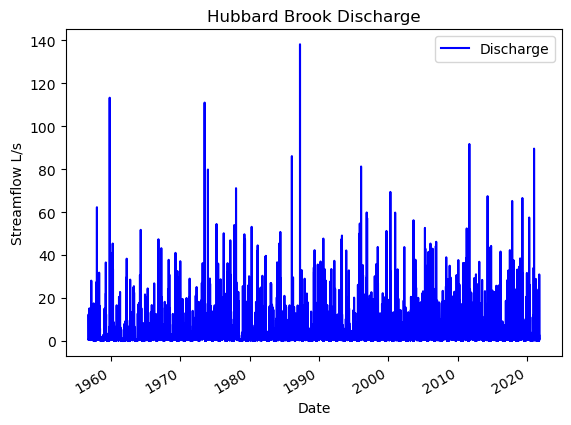

In [8]:
#%% Plotting Raw Time Series Discharge

# Create plot to display time series data
fig, ax = plt.subplots()

# Plot discharge data series
ax.plot(data['discharge_L/s'],        # x = 1st series, y = 2nd series)
        'b-',                            # blue line 
        label = 'Discharge')             # series label for legend

# Add plot components 
ax.set_xlabel('Date')                    # x-axis label 
ax.set_ylabel('Streamflow L/s')                  # y-axis label
ax.set_title('Hubbard Brook Discharge')           # figure title
ax.legend()                                   # legend

# Optional command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()

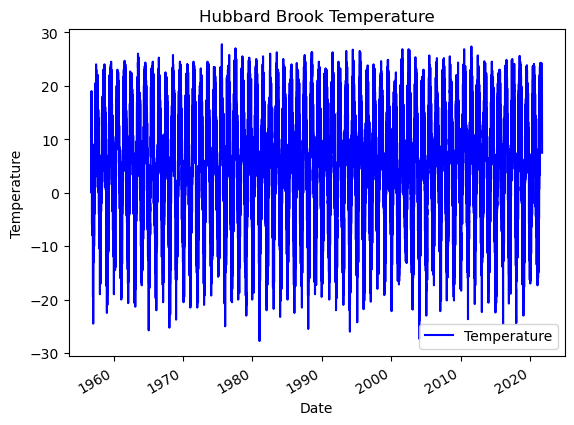

In [9]:
#%% Plotting Raw Time Series Temperature

# Create plot to display time series data
fig, ax = plt.subplots()

# Plot discharge data series
ax.plot(data['Average Temp'],        # x = 1st series, y = 2nd series)
       'b-',                            # blue line 
       label = 'Temperature')             # series label for legend

# Add plot components 
ax.set_xlabel('Date')                    # x-axis label 
ax.set_ylabel('Temperature')                  # y-axis label
ax.set_title('Hubbard Brook Temperature')           # figure title
ax.legend()                                   # legend

# Optional command to make x-tick labels disagonal to avoid overlap
fig.autofmt_xdate()

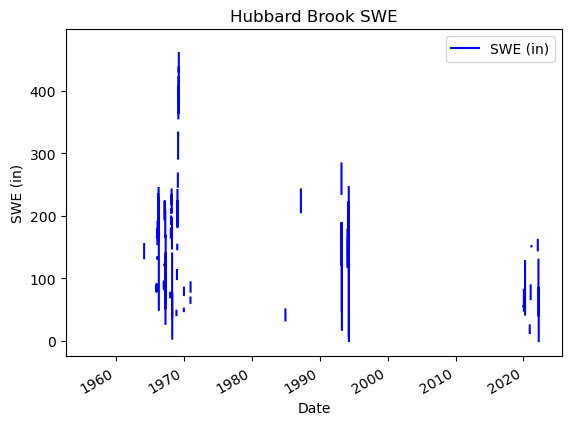

In [10]:
#%% Plotting Raw Time Series SWE

# Create plot to display time series data
fig, ax = plt.subplots()

# Plot discharge data series
ax.plot(data_swe['swe'],        # x = 1st series, y = 2nd series)
        'b-',                            # blue line 
        label = 'SWE (in)')             # series label for legend

# Add plot components 
ax.set_xlabel('Date')                    # x-axis label 
ax.set_ylabel('SWE (in)')                  # y-axis label
ax.set_title('Hubbard Brook SWE')           # figure title
ax.legend()                                   # legend

# Optional command to make x-tick labels disagonal to avoid overlap
fig.autofmt_xdate()

Creating raster plots for SWE, Temperature and Streamflow. These plots visually represent every data point in the data set. 

C:\Users\brian\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


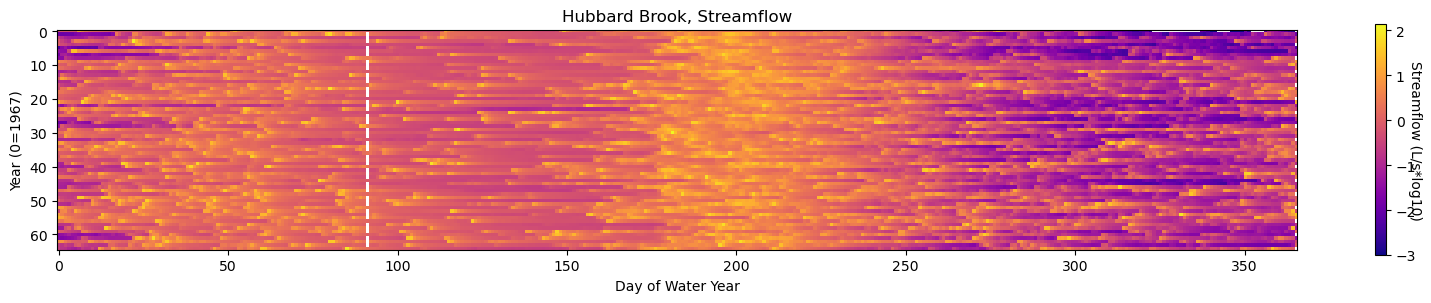

In [11]:
#%% Plotting raster for Streamflow
fig, ax = plt.subplots(figsize=(20, 3)) #plot figure with size
a=ax.imshow(np.log10(q_reshaped), cmap=mpl.colormaps['plasma']) #data for plot and color bar colors
f=fig.colorbar(a,ax = ax) #making color bar
# Add plot components 
ax.set_xlabel('Day of Water Year')                    # x-axis label 
ax.set_ylabel('Year (0=1967)')                        # y-axis label
ax.set_title('Hubbard Brook, Streamflow')              # figure title
f.set_label('Streamflow (L/s*log10)', rotation=270)    #colorbar label

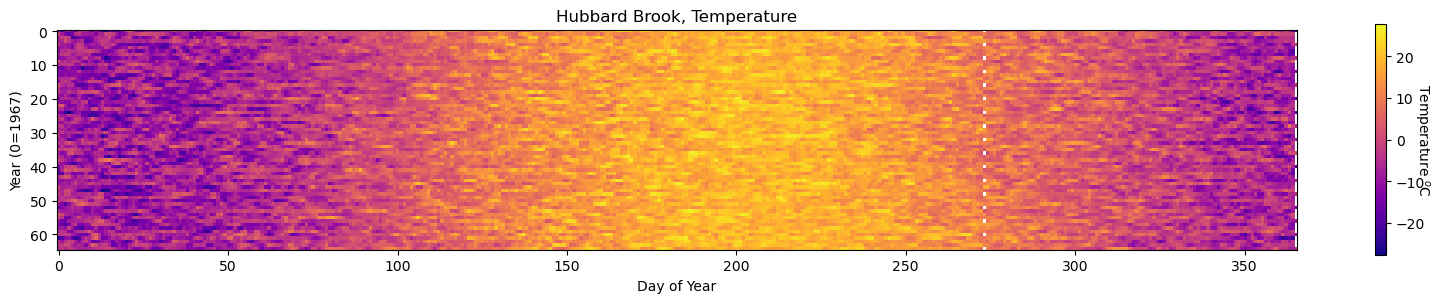

In [12]:
#%% Raster for Temperature
fig, ax = plt.subplots(figsize=(20, 3)) #plot figure with size
c=ax.imshow((t_reshaped), cmap=mpl.colormaps['plasma']) #data for plot and color bar colors
f=fig.colorbar(c,ax = ax)

# Add plot components 
ax.set_xlabel('Day of Year')                    # x-axis label 
ax.set_ylabel('Year (0=1967)')                  # y-axis label
ax.set_title('Hubbard Brook, Temperature')           # figure title
f.set_label('Temperature $^o$C', rotation=270)        #colorbar label

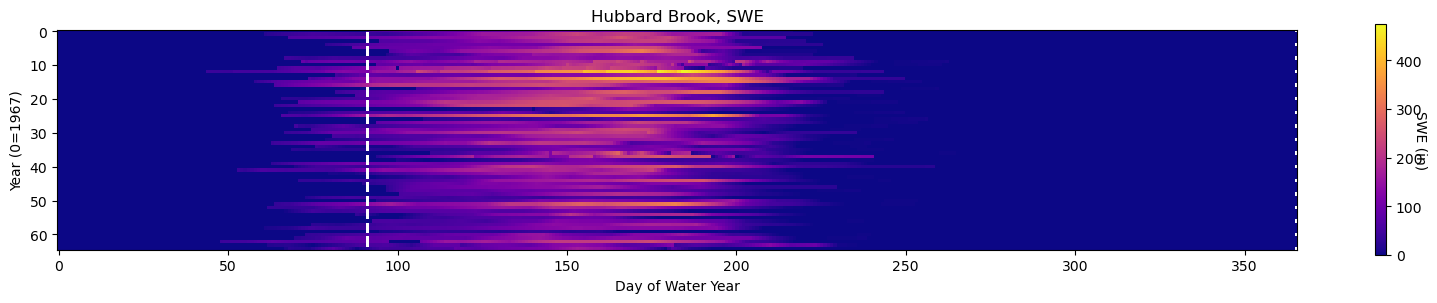

In [13]:
#%% Raster for SWE
fig, ax = plt.subplots(figsize=(20, 3))    #plot figure with size
b=ax.imshow((swe_reshaped), cmap=mpl.colormaps['plasma']) #data for plot and color bar colors
f=fig.colorbar(b,ax = ax)             #making color bar

# Add plot components 
ax.set_xlabel('Day of Water Year')          # x-axis label 
ax.set_ylabel('Year (0=1967)')              # y-axis label
ax.set_title('Hubbard Brook, SWE')           # figure title
f.set_label('SWE (in)', rotation=270)        #colorbar label

Calcualting centroids for SWE, Temperature, and Streamflow with function and for loop and placing into a single dataframe. 

In [14]:
#%% Colculating Centroids
def centroid(reshaped):
    annual = pd.Series(index=reshaped.index,dtype=float)
    
    #Centroid
    for i in range (0,len(reshaped)) :
        t =reshaped.iloc[i].index
        r=reshaped.iloc[i]
        centroid = np.sum(t*r)/np.sum(r)
        annual.loc[annual.index[i]]=centroid
    return annual
#Running functions for centriods
annual = pd.DataFrame()
annual['q_centroid']=centroid(q_reshaped)
annual['swe_centroid']=centroid(swe_reshaped)
annual['temp_centroid']=centroid(t_reshaped)

In [15]:
#%% Linear Regressions
#Create function
def regressplot(time_series,data_series, y_label, figtitle):
    #Calculate parametric linear regression values
    lsq_coeff = stats.linregress(time_series,data_series)
    
    #Create plot and show time series of input data series
    fig, ax = plt.subplots()
    ax.plot(data_series, 'k.')
    #Parametric best fit line
    ax.plot(time_series, lsq_coeff.intercept + lsq_coeff.slope *
           time_series, 'darkviolet', label='Linear regression')
    #Annotation Placement
    xx = ax.get_xlim()
    yy = ax.get_ylim()
    
    #Display least squares parametric slope and correlation on graph
    ax.annotate(f'Least-Squares Slope = {lsq_coeff.slope:.4f} +/- {2*lsq_coeff.stderr:.4f}',
                xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.18*(yy[1]-yy[0])),
                horizontalalignment='right')
    ax.annotate(f'Least-squares correlation = {lsq_coeff.rvalue:.4f}; p = {lsq_coeff.pvalue:.4f}',
                xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.13*(yy[1]-yy[0])),
                horizontalalignment='right')
    ax.set_title(figtitle)
    ax.set_ylabel(y_label)
    ax.legend(loc='upper center')
    plt.show()
    return lsq_coeff

regressplot(annual.index,annual['swe_centroid'],'Day of Wateryear',' SWE Centroid for Experimental Forest, NH')
regressplot(annual.index,annual['temp_centroid'],'Day of Year',' Temperature Centroid for Experimental Forest, NH')
regressplot(annual.index,annual['q_centroid'],'Day of Wateryear','Streamflow Centroid for Experimental Forest, NH')

NameError: name 'stats' is not defined

# Discussion:
From this study the results are difficult to define any conclussion. With the linear regresion of centriods there does not appear to be any shift in the 'Winter Season'. Using a significant p-value of 0.05 there is no significance with any shift of centroid of SWE, Streamflow, or Temperature. 
Overall based on this study there is no statistical evidence of any shifting in the Winter Season. 
It is improtant to note that the centroid reffers to the middle of the season which may not have a significant change if the season is occuring later with the same end of the season. The ending of the season appears to be constant throughout the study period shown in the Raster plot for Streamflow with peak stremflow (reffering to snow melt) as constant. 
Shown in the Raster plot for SWE it appears that the winter season maynot be shifting but the season is becoming less intense.
Shown in the Scatter plots there appears to be a slight negative slope in the trend line. This would represent a possible earlier shifting in the season.

Literature:
This study is about gloabl warming and if it is harming the seasons in NH. The study suggests a sooner end to the seaon which coinsides with a longer transition period between winter and spring with is affecting recreation. 
https://home.dartmouth.edu/news/2017/04/study-climate-change-affecting-nh-seasons